<a href="https://colab.research.google.com/github/palpratik56/Classification-using-DL/blob/main/Butterfly_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 96% 217M/226M [00:03<00:00, 113MB/s] 
100% 226M/226M [00:03<00:00, 69.7MB/s]


In [11]:
!unzip butterfly-image-classification

Streaming output truncated to the last 5000 lines.
  inflating: train/Image_2348.jpg    
  inflating: train/Image_2349.jpg    
  inflating: train/Image_235.jpg     
  inflating: train/Image_2350.jpg    
  inflating: train/Image_2351.jpg    
  inflating: train/Image_2352.jpg    
  inflating: train/Image_2353.jpg    
  inflating: train/Image_2354.jpg    
  inflating: train/Image_2355.jpg    
  inflating: train/Image_2356.jpg    
  inflating: train/Image_2357.jpg    
  inflating: train/Image_2358.jpg    
  inflating: train/Image_2359.jpg    
  inflating: train/Image_236.jpg     
  inflating: train/Image_2360.jpg    
  inflating: train/Image_2361.jpg    
  inflating: train/Image_2362.jpg    
  inflating: train/Image_2363.jpg    
  inflating: train/Image_2364.jpg    
  inflating: train/Image_2365.jpg    
  inflating: train/Image_2366.jpg    
  inflating: train/Image_2367.jpg    
  inflating: train/Image_2368.jpg    
  inflating: train/Image_2369.jpg    
  inflating: train/Image_237.jpg     

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("Training_set.csv")
df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [13]:
df['label'].value_counts()

label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
SCARCE SWALLOW     97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64

In [14]:
test_df = pd.read_csv('Testing_set.csv')
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


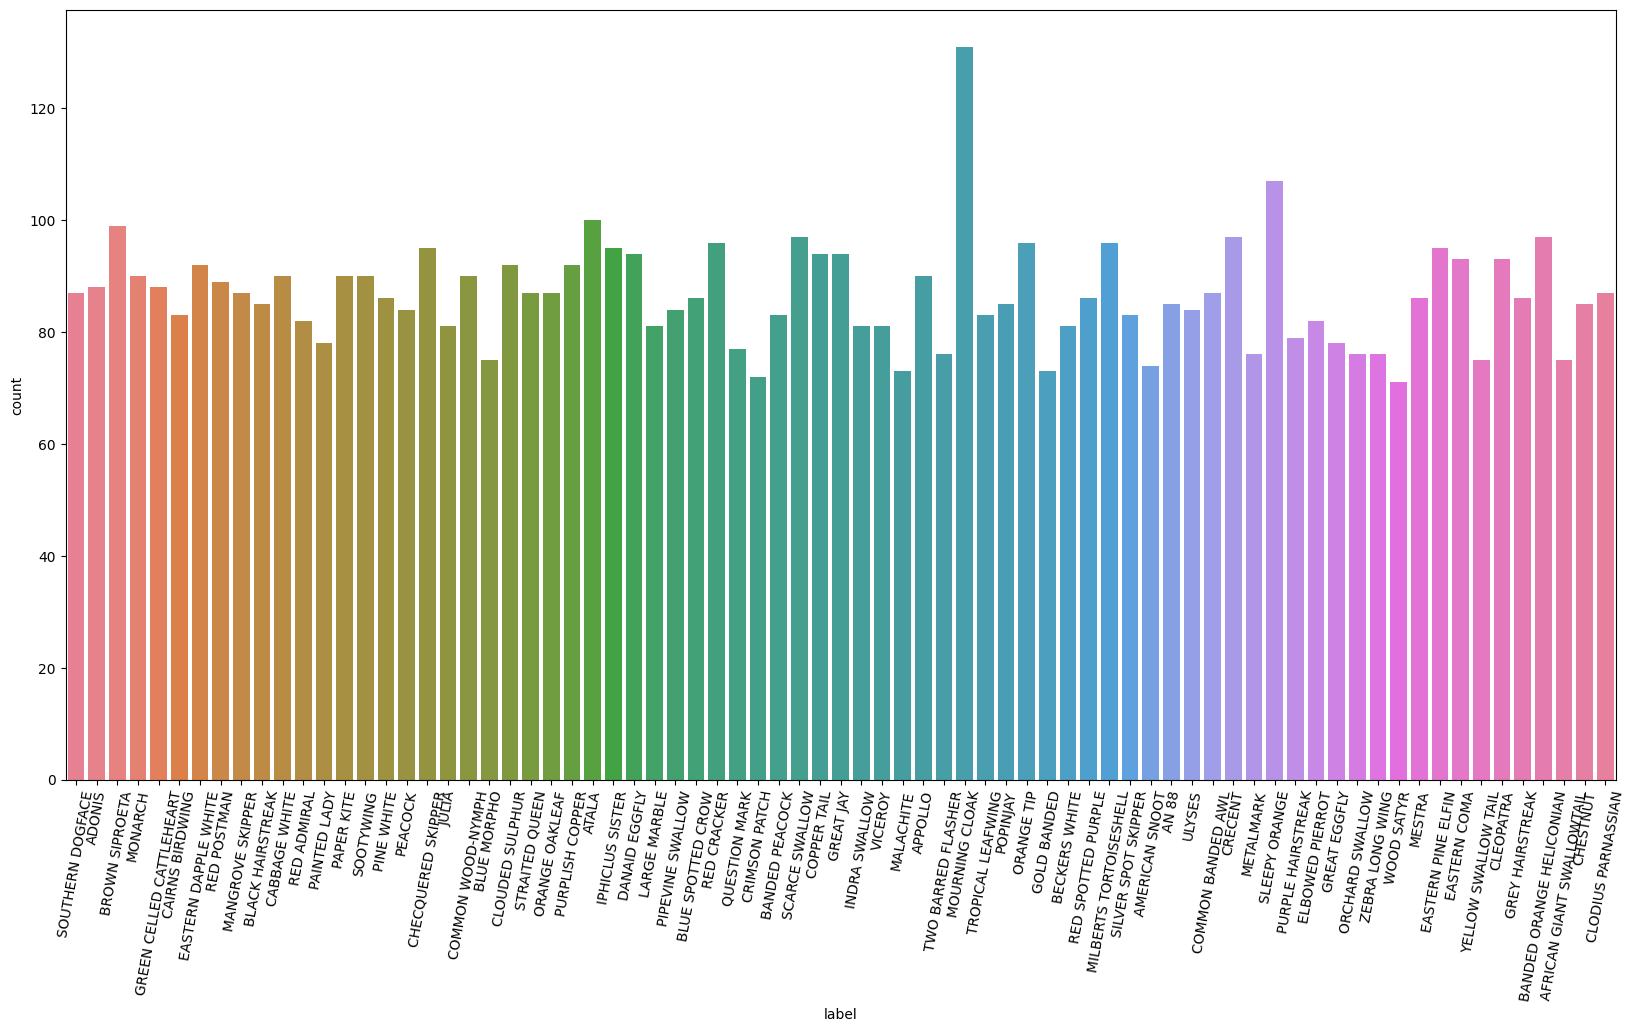

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=80)
sns.countplot(data=df, x='label', hue='label')
plt.show()

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers, models,callbacks, optimizers, Input
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, ReLU, Add, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# prompt: randomly delete 200 images from train folder and 586 images from test folder

import os
import random

# Set the paths to your train and test folders
train_folder = 'train'
test_folder = 'test'

# Number of images to delete
num_train_delete = 200
num_test_delete = 586

# Get a list of all image files in the train folder
train_images = [f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))]

# Randomly select images to delete from the train folder
train_images_to_delete = random.sample(train_images, num_train_delete)

# Delete the selected images from the train folder
for image in train_images_to_delete:
  os.remove(os.path.join(train_folder, image))

# Get a list of all image files in the test folder
test_images = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

# Randomly select images to delete from the test folder
test_images_to_delete = random.sample(test_images, num_test_delete)

# Delete the selected images from the test folder
for image in test_images_to_delete:
  os.remove(os.path.join(test_folder, image))

print(f"Deleted {num_train_delete} images from train folder and {num_test_delete} images from test folder.")


Deleted 200 images from train folder and 586 images from test folder.


In [16]:
image_size=(224,224)

train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_dataframe(df,directory='train',seed = 42,x_col='filename',y_col='label',
                                        target_size=image_size,batch_size=32,class_mode='categorical',subset='training'
)

val_data = train_datagen.flow_from_dataframe(df,directory='train',seed = 42,x_col='filename',y_col='label',
                                      target_size=image_size,batch_size=32,class_mode='categorical',subset='validation'
)

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,directory='test', x_col='filename',y_col=None,
                                            class_mode=None,target_size=(224, 224),batch_size=32,shuffle=False
)

Found 5040 validated image filenames belonging to 75 classes.
Found 1259 validated image filenames belonging to 75 classes.
Found 2200 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 200 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 200 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 586 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


### Transfer Learning (VGG19 architecture)

In [19]:
from keras.applications import VGG19,InceptionV3
conv_base = InceptionV3(include_top = False,input_shape=(224,224,3)
)
for layer in conv_base.layers:
  layer.trainable=False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

In [21]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    conv_base,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(75, activation='softmax')
])

model.compile(optimizer= 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                      

In [23]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  patience=5, min_delta=0.01, restore_best_weights=True )


hist = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=[early_stopping]).history

Epoch 1/20
158/158 [==============================] - 28s 175ms/step - loss: 2.6241 - accuracy: 0.3371 - val_loss: 1.6407 - val_accuracy: 0.5941
Epoch 2/20
158/158 [==============================] - 17s 105ms/step - loss: 1.4322 - accuracy: 0.6028 - val_loss: 1.1528 - val_accuracy: 0.6934
Epoch 3/20
158/158 [==============================] - 16s 98ms/step - loss: 1.0359 - accuracy: 0.7032 - val_loss: 0.9289 - val_accuracy: 0.7411
Epoch 4/20
158/158 [==============================] - 16s 98ms/step - loss: 0.8120 - accuracy: 0.7587 - val_loss: 0.8703 - val_accuracy: 0.7744
Epoch 5/20
158/158 [==============================] - 17s 108ms/step - loss: 0.6499 - accuracy: 0.8044 - val_loss: 0.7605 - val_accuracy: 0.7879
Epoch 6/20
158/158 [==============================] - 16s 98ms/step - loss: 0.5624 - accuracy: 0.8310 - val_loss: 0.7687 - val_accuracy: 0.7887
Epoch 7/20
158/158 [==============================] - 15s 98ms/step - loss: 0.4898 - accuracy: 0.8581 - val_loss: 0.7093 - val_accura

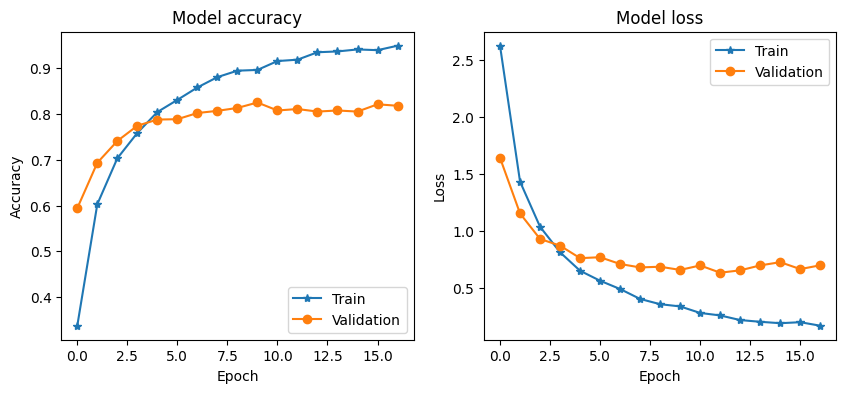

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(hist['accuracy'], '*-')
plt.plot(hist['val_accuracy'], 'o-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist['loss'], '*-')
plt.plot(hist['val_loss'], 'o-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

In [25]:
val_loss, val_acc = model.evaluate(val_data)

40/40 [==============================] - 3s 81ms/step - loss: 0.6329 - accuracy: 0.8110


In [26]:
predictions = model.predict(test_data, steps=len(test_data))
class_labels = list(train_data.class_indices.keys())
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_labels = [class_labels[i] for i in predicted_classes]

69/69 [==============================] - 9s 110ms/step


In [31]:
# filename = test_df['filename'].iloc[2]
# df[df['filename'] == filename].label.values[0]
# len(test_df)
len(predicted_class_labels)

2200

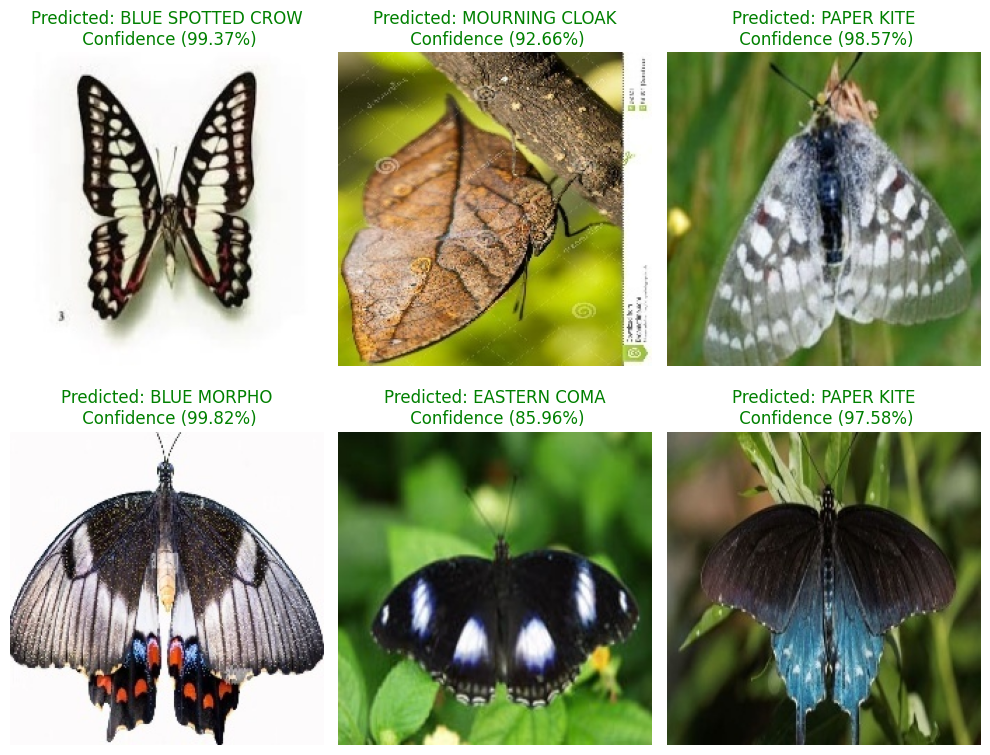

In [33]:
from keras.preprocessing.image import load_img
sample_size = 6
sample_indices = np.random.choice(len(test_df)-586, sample_size, replace=False)

plt.figure(figsize=(10,8))

for i, idx in enumerate(sample_indices):
    filename = test_df['filename'].iloc[idx]
    predicted_class = predicted_class_labels[idx]
    confidence = np.max(predictions[idx]) * 100

    img_path = f'test/{filename}'
    img = load_img(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\n Confidence ({confidence:.2f}%)", color='g')
    plt.axis('off')

plt.tight_layout()
plt.show()